<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/metamaterial_device3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-56703c38b549>:49: RuntimeWarning: divide by zero encountered in divide
  Z_in = V / I  # Impedância de entrada simulada (simplificação)
<ipython-input-1-56703c38b549>:49: RuntimeWarning: invalid value encountered in divide
  Z_in = V / I  # Impedância de entrada simulada (simplificação)
<ipython-input-1-56703c38b549>:50: RuntimeWarning: invalid value encountered in divide
  reflection_coefficient = (Z_in - Z_0) / (Z_in + Z_0)


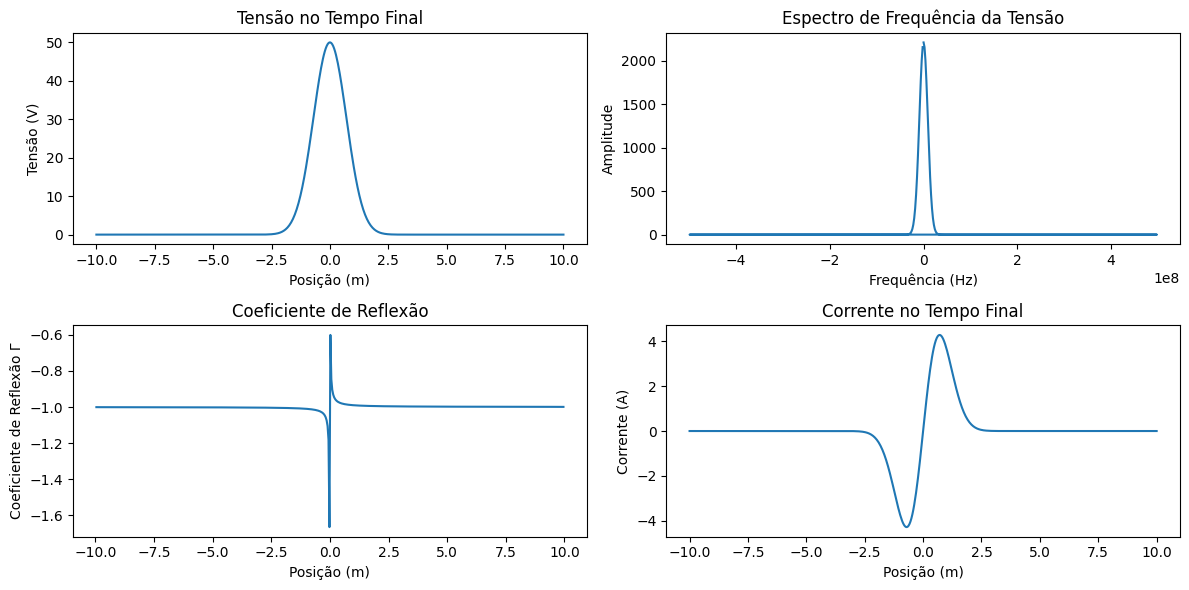

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.constants import mu_0, epsilon_0

# Parâmetros do dispositivo e condições iniciais
L = 1e-5  # Indutância (H/m)
C = 1e-11  # Capacitância (F/m)
R = 50  # Resistência (Ohm)
V0 = 50.0  # Amplitude inicial da tensão (V)
sigma = 1.0  # Largura do pulso inicial
ig = 50.0  # Constante de acoplamento para interação de gauge

# Faixa de espaço e tempo
x_range = np.linspace(-10, 10, 500)  # Espaço (m)
t_range = np.linspace(0, 1e-6, 1000)  # Tempo (s)

# Inicialização dos campos
V = np.zeros((len(t_range), len(x_range)))
I = np.zeros((len(t_range), len(x_range)))
A_mu = np.zeros((len(t_range), len(x_range)))  # Potencial vetorial

# Condição inicial para a tensão
V[0, :] = V0 * np.exp(-x_range**2 / sigma**2)

# Método de diferenças finitas para propagação
dx = x_range[1] - x_range[0]
dt = t_range[1] - t_range[0]
c1 = dt / L
c2 = dt * C

for n in range(len(t_range) - 1):
    for i in range(1, len(x_range) - 1):
        dV_dx = (V[n, i + 1] - V[n, i - 1]) / (2 * dx)
        dI_dx = (I[n, i + 1] - I[n, i - 1]) / (2 * dx)

        # Derivada covariante para corrente e tensão
        D_mu_I = dV_dx + ig * A_mu[n, i] * V[n, i]
        D_mu_V = dI_dx + ig * A_mu[n, i] * I[n, i]

        I[n + 1, i] = I[n, i] - c1 * D_mu_I
        V[n + 1, i] = V[n, i] - c2 * D_mu_V

        # Atualização do potencial vetorial
        A_mu[n + 1, i] = A_mu[n, i] + mu_0 * I[n, i] * dt

# Calcular o coeficiente de reflexão
Z_0 = np.sqrt(L / C)  # Impedância característica
Z_in = V / I  # Impedância de entrada simulada (simplificação)
reflection_coefficient = (Z_in - Z_0) / (Z_in + Z_0)

# Análise de frequência usando FFT
V_fft = fft(V[-1, :])
frequencies = np.fft.fftfreq(len(V_fft), dt)

# Plotando resultados
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(x_range, V[-1, :])
plt.title("Voltage at Final Time")
plt.xlabel("Position (m)")
plt.ylabel("Voltage (V)")

plt.subplot(2, 2, 2)
plt.plot(frequencies, np.abs(V_fft))
plt.title("Voltage Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

plt.subplot(2, 2, 3)
plt.plot(x_range, reflection_coefficient[-1, :])
plt.title("Reflection Coefficient")
plt.xlabel("Position (m)")
plt.ylabel("Reflection Coefficient Γ")

plt.subplot(2, 2, 4)
plt.plot(x_range, I[-1, :])
plt.title("Current at Final Time")
plt.xlabel("Position (m)")
plt.ylabel("Current (A)")

plt.tight_layout()
plt.show()
